### Libraries

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [27]:
## import data
data = pd.read_csv(r"D:\Projects\Loan Approval Prediction\train.csv")

In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
data.shape

(614, 13)

In [32]:
data.dropna().shape

(480, 13)

In [33]:
data_1 = data.dropna()

In [34]:
data_1.duplicated().value_counts()

False    480
dtype: int64

### Exploratory Data Analysis

#### Univariate analysis

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [39]:
data_1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [41]:
num = data_1.select_dtypes(include = ['int64','float64'])
num = num.drop(['Credit_History'],axis = 1)

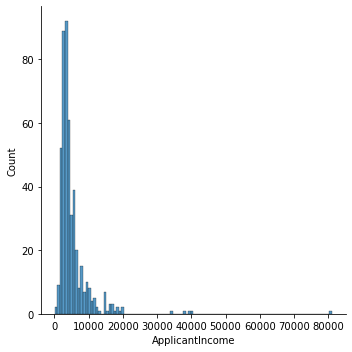

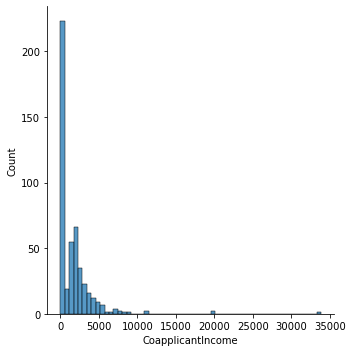

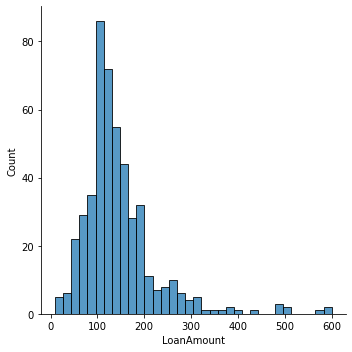

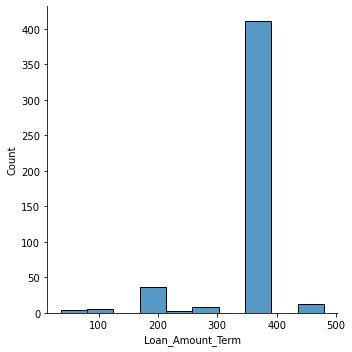

In [42]:
for i in num.columns:
        sns.displot(data = num,x = i)
        plt.show()

All the columns except Loan_Amount_term, are right skewed with higher means than medians.

Loan Amount Term is left skewed and the mode is 360 months.

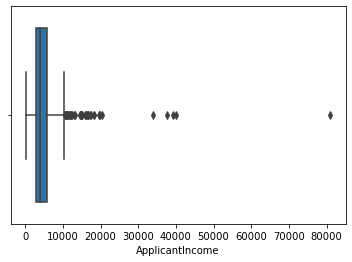

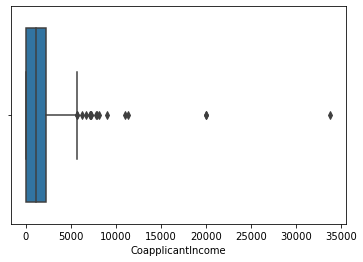

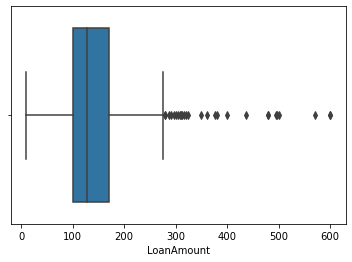

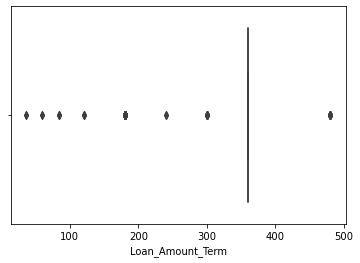

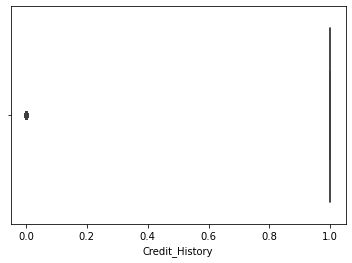

In [14]:
for i in num.columns:
        sns.boxplot(data = num,x = i)
        plt.show()

All the columns have potential outliers.

Credit history refers to a record of a person's borrowing and repayment activities. It provides a detailed account of an individual's use of credit over time. Credit history is a crucial component of a person's credit report, and it is used by lenders and financial institutions to assess creditworthiness when deciding whether to approve a loan, credit card application, or other forms of credit. 

In this dataset, credit history is a categorical variable

In [43]:
dict1 = {0:'No',1:'Yes'}
data_1['Credit_History'] = data_1['Credit_History'].map(dict1)

C:\Users\Dell\AppData\Local\Temp/ipykernel_8240/4183382128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Credit_History'] = data_1['Credit_History'].map(dict1)


In [44]:
data_1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Yes,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Yes,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Yes,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,Yes,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,Yes,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,Yes,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,Yes,Urban,Y


In [45]:
data_1.describe(exclude = 'number')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,480,480,480,480,480,480,480,480,480
unique,480,2,2,4,2,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Yes,Semiurban,Y
freq,1,394,311,274,383,414,410,191,332


In [46]:
cat = data_1.select_dtypes(include = ['object'])

In [47]:
cat = cat.drop('Loan_ID',axis = 1)

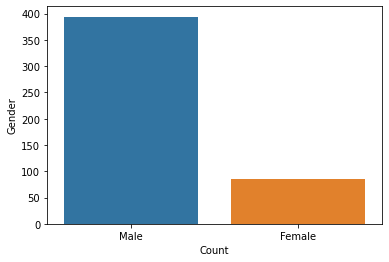

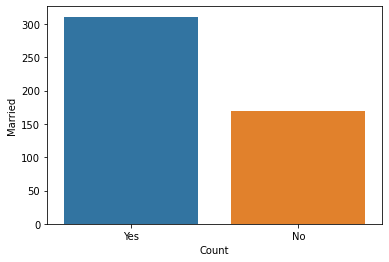

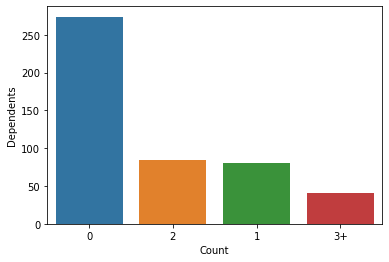

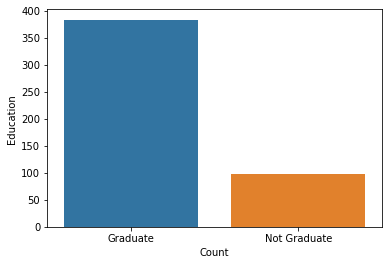

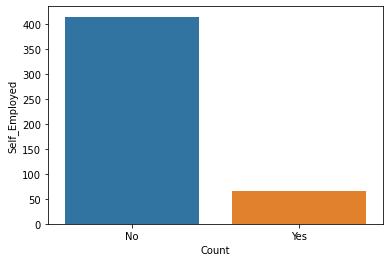

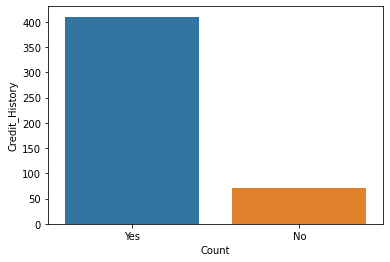

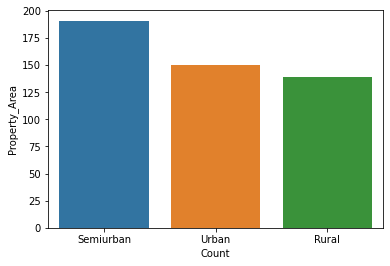

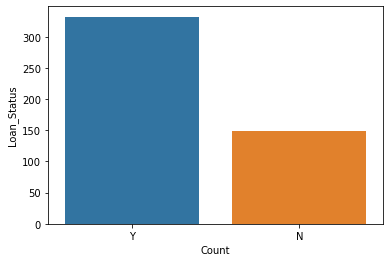

In [48]:
for i in cat.columns:
    a = cat[i].value_counts().reset_index()
    a = a.rename(columns = {'index':'Count'})
    sns.barplot(data = a,x = 'Count',y = i)
    plt.show()
    

The Male count is considerably higher than the female count. Married people count is larger than unmarried. The Dependents variable has 4 values, most of the applicants seem to have no dependents.The population of gradutes is higher than non-graduates. Self employed people count is considerably lesser than non self-employed. People holding a credit history is more than those of who don't have a credit history.

The Loan Status is the target variable where Approved has more count.

#### Bivariate Analysis

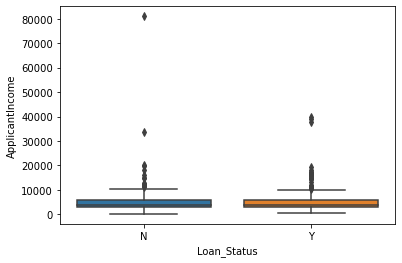

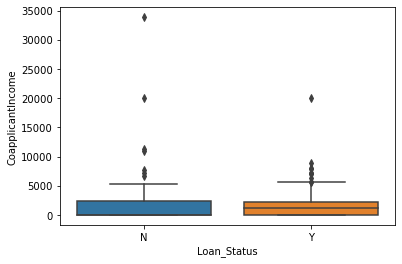

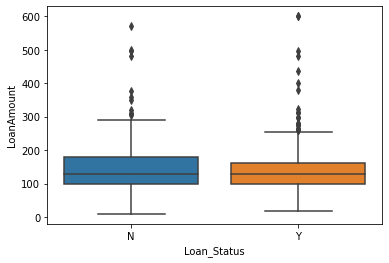

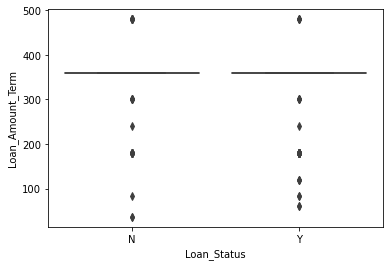

In [49]:
for i in num.columns:
        sns.boxplot(data = data_1,y = i,x = 'Loan_Status')
        plt.show()

In [50]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    object 
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 68.7+ KB


In [51]:
yes = data_1[data_1['Loan_Status']=='Y']
no = data_1[data_1['Loan_Status']=='N']

In [52]:
yes.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843
std,4584.815491,1982.742932,75.544237,61.651497
min,645.000000,0.000000,17.000000,60.000000
25%,2912.750000,0.000000,100.000000,360.000000
50%,3858.500000,1211.500000,128.000000,360.000000
75%,5818.250000,2250.000000,162.000000,360.000000
max,39999.000000,20000.000000,600.000000,480.000000


In [53]:
no.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,148.000000,148.000000,148.000000,148.000000
mean,5730.189189,1773.081081,153.378378,342.810811
std,7560.806737,3663.685217,90.339150,72.787021
min,150.000000,0.000000,9.000000,36.000000
25%,2863.500000,0.000000,100.000000,360.000000
50%,3871.000000,0.000000,128.000000,360.000000
75%,6046.250000,2356.250000,178.500000,360.000000
max,81000.000000,33837.000000,570.000000,480.000000


The interquartile range and mean of all the variables for both the loan status doesn't have any highly considerable differences.

There are a lot of outliers in all the features for both the categories.

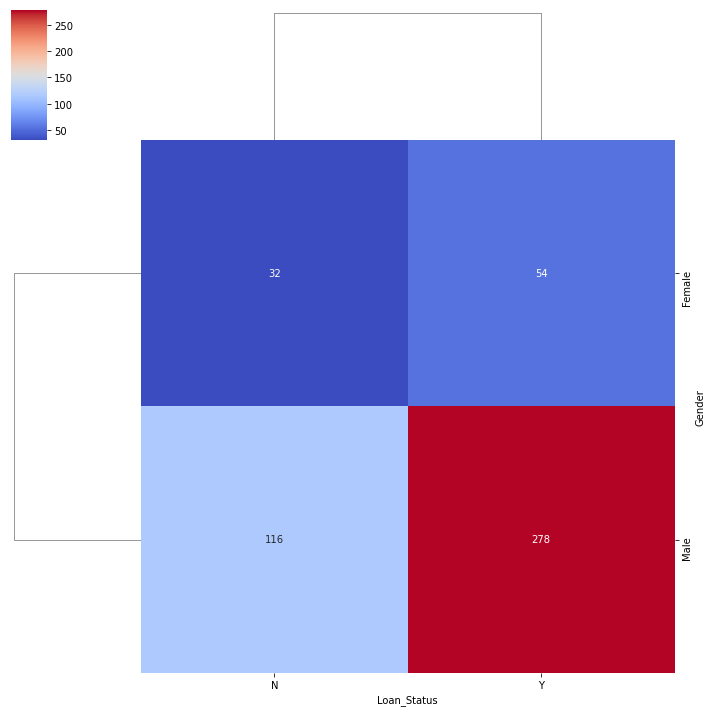

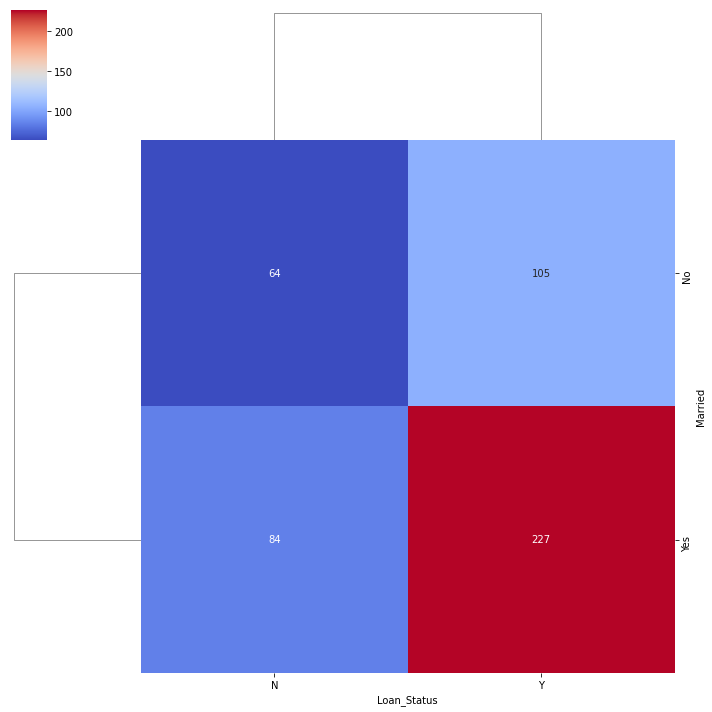

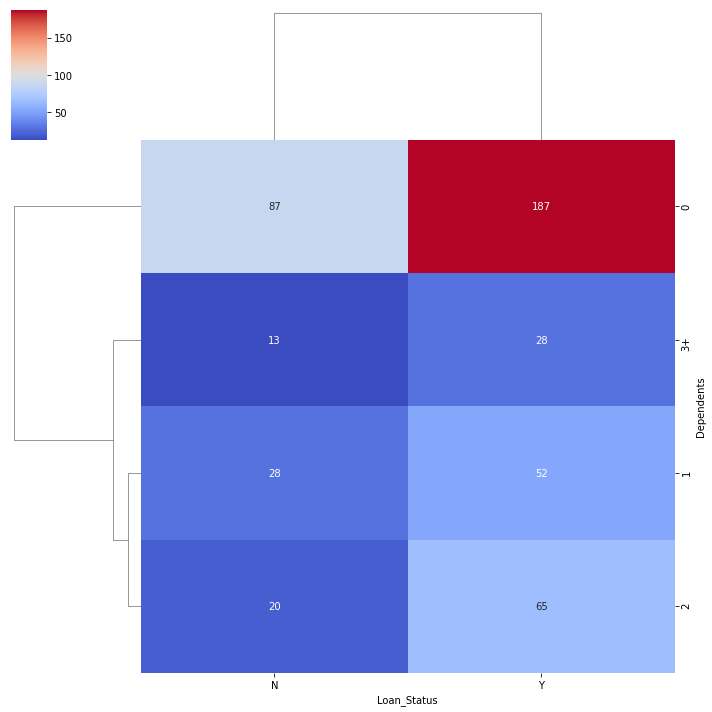

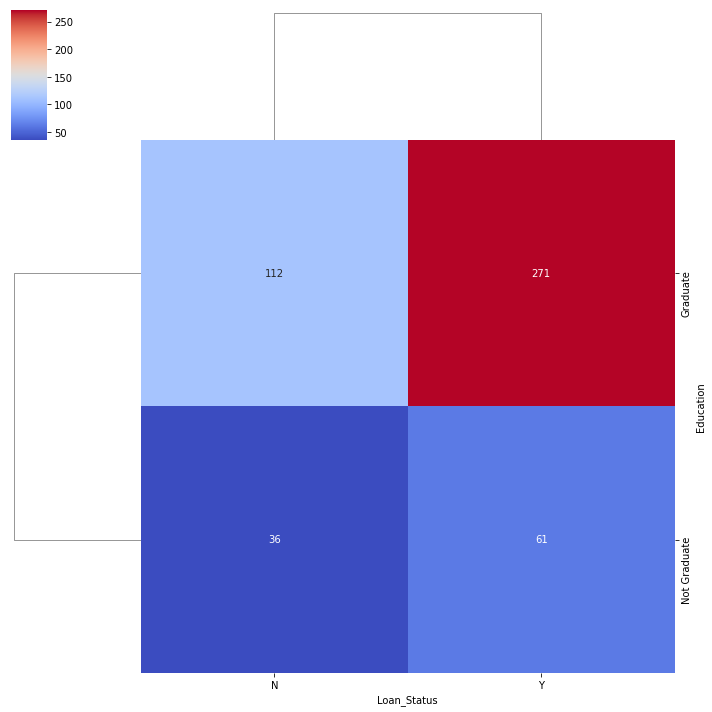

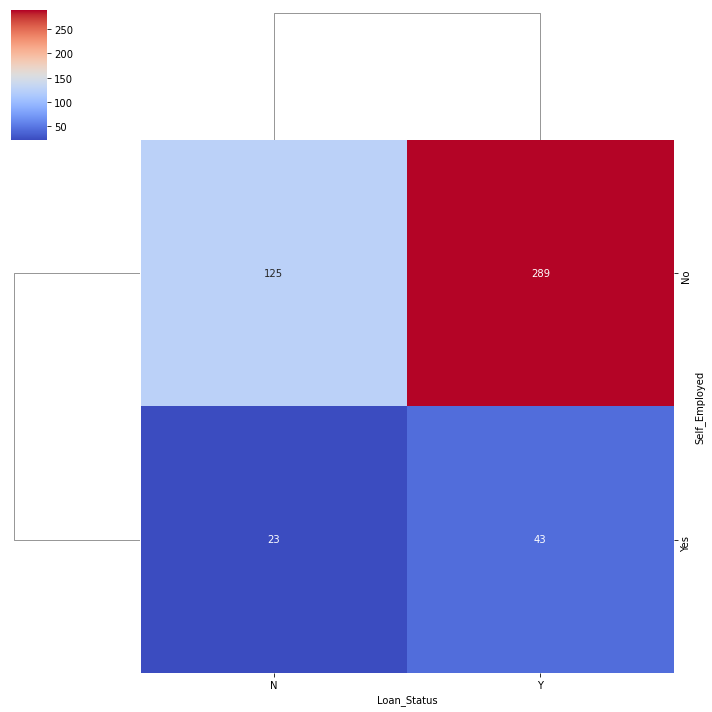

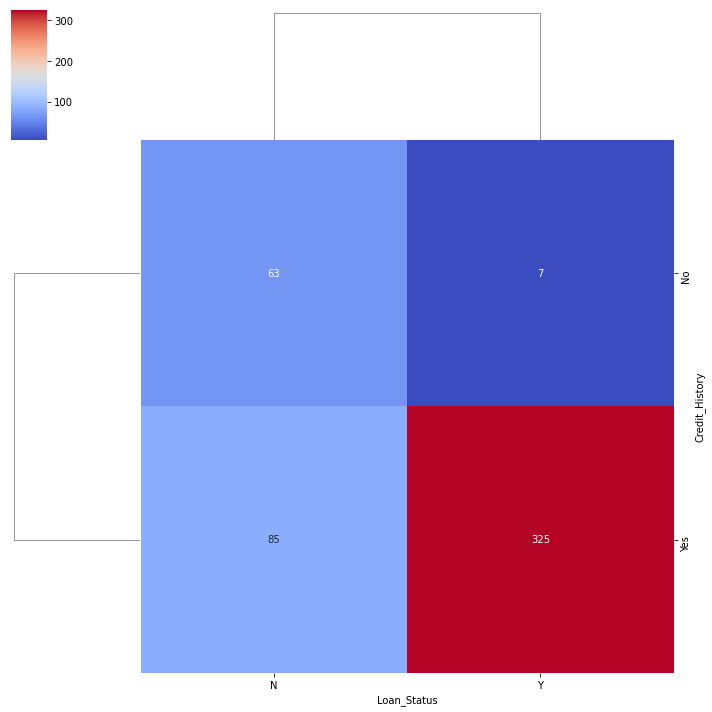

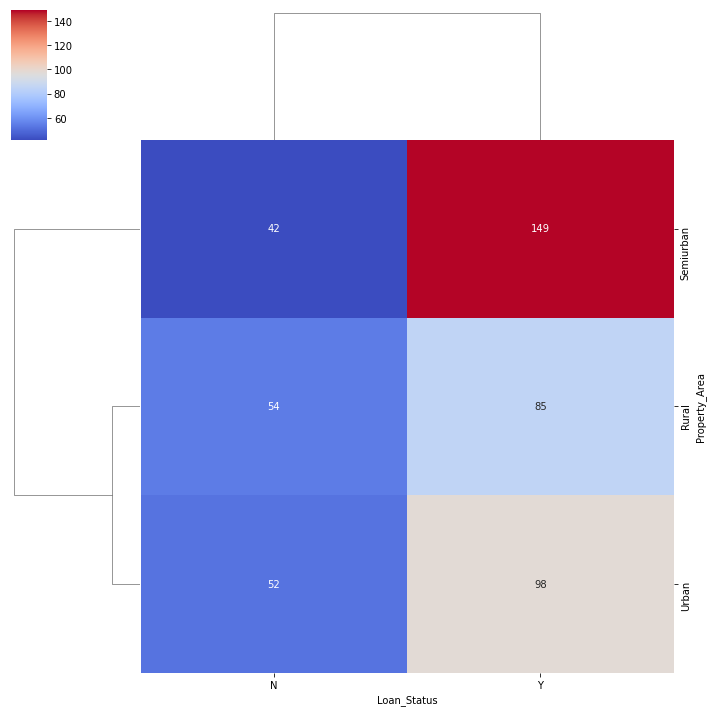

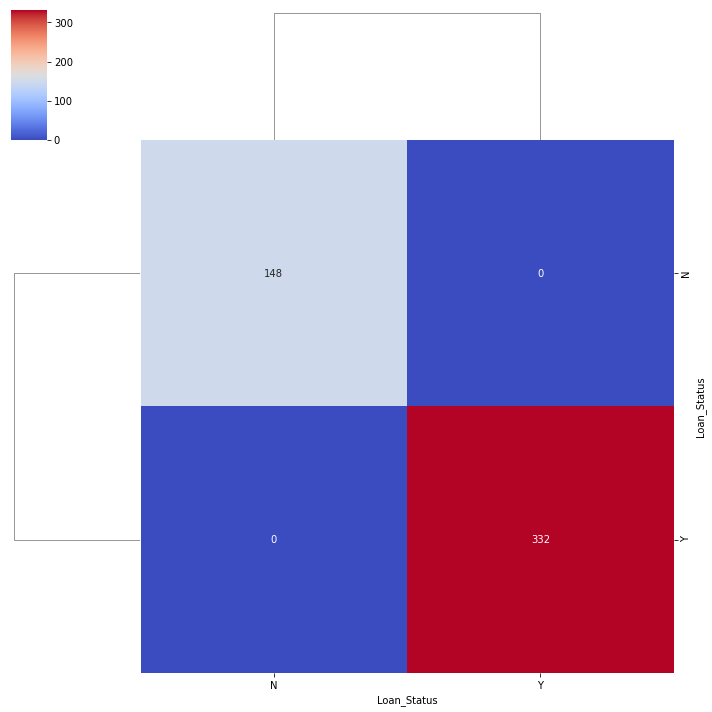

In [54]:
for i in cat.columns:
    sns.clustermap(pd.crosstab(cat[i], cat['Loan_Status']), cmap='coolwarm', annot=True, fmt='d')
    plt.show()

People with a credit History are more likely to get the loan and self employed people are less likely to get loan.

#### Multivariate Analysis

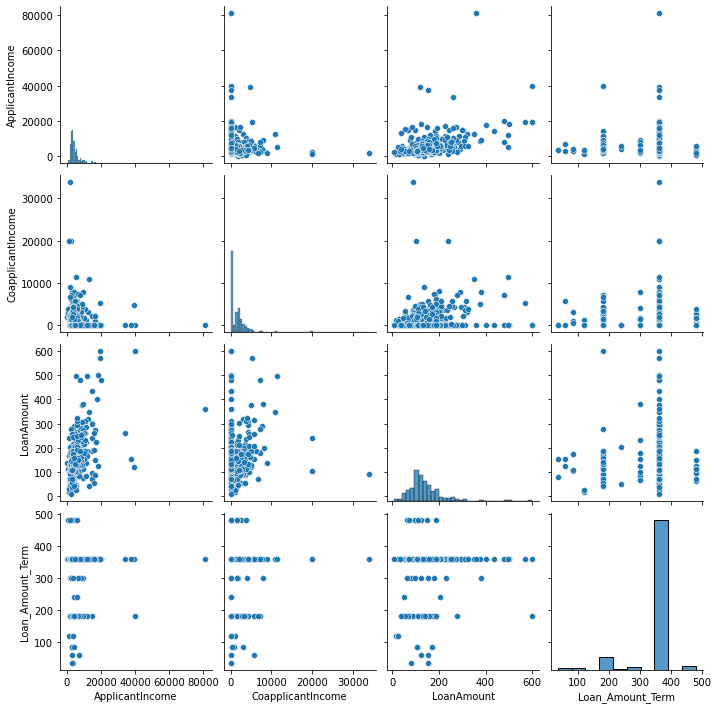

In [55]:
sns.pairplot(num)

The above plot makes sure that there isn't any relationship among the quantitative variables

### Pre-processing

In [56]:
for i in cat.columns:
    print(i)
    a = pd.get_dummies(cat[i],prefix = i)
    cat = pd.concat([cat,a],axis = 1)    

Gender
Married
Dependents
Education
Self_Employed
Credit_History
Property_Area
Loan_Status


In [57]:
encoded = cat.drop(['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status','Loan_Status_N','Loan_Status_Y'],axis = 1)

In [58]:
encoded.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Credit_History_No', 'Credit_History_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [59]:
encoded

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
5,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0
610,0,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0
611,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
612,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1


In [60]:
encoded = pd.concat([encoded,num],axis = 1)

We are using min-max scaler here as the numerical features do not follow normal distribution and contains few outliers

In [61]:
min_max = MinMaxScaler()
scaled = min_max.fit_transform(encoded)

In [62]:
scaled 

array([[0.        , 1.        , 0.        , ..., 0.0445666 , 0.20135364,
        0.72972973],
       [0.        , 1.        , 0.        , ..., 0.        , 0.0964467 ,
        0.72972973],
       [0.        , 1.        , 0.        , ..., 0.06968703, 0.18781726,
        0.72972973],
       ...,
       [0.        , 1.        , 0.        , ..., 0.00709283, 0.41285956,
        0.72972973],
       [0.        , 1.        , 0.        , ..., 0.        , 0.30118443,
        0.72972973],
       [1.        , 0.        , 1.        , ..., 0.        , 0.20981387,
        0.72972973]])

In [166]:
mapping = {'N':0,'Y':1}
y = data_1['Loan_Status'].map(mapping)
X = encoded

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [111]:
logistic = LogisticRegression()

In [112]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [113]:
coefficients = logistic.coef_[0]
intercept = logistic.intercept_[0]

# Display the coefficients and intercept
print(f'Intercept: {intercept:.4f}')
for feature, coefficient in zip(X.columns, coefficients):
    print(f'{feature}: {coefficient:.4f}')

Intercept: 0.1347
Gender_Female: -0.0190
Gender_Male: 0.1537
Married_No: -0.3441
Married_Yes: 0.4788
Dependents_0: -0.0529
Dependents_1: -0.0374
Dependents_2: 0.2662
Dependents_3+: -0.0413
Education_Graduate: 0.3903
Education_Not Graduate: -0.2557
Self_Employed_No: 0.2828
Self_Employed_Yes: -0.1482
Credit_History_No: -1.3660
Credit_History_Yes: 1.5006
Property_Area_Rural: -0.4260
Property_Area_Semiurban: 0.6358
Property_Area_Urban: -0.0751
ApplicantIncome: 0.0001
CoapplicantIncome: -0.0001
LoanAmount: -0.0052
Loan_Amount_Term: -0.0019


The features namely the gender, no od dependents, Marital Status,Educational status, employement status, Credit history and Property are seem to have a considerable effect over the approval of loan. Though the variables like Applicant income, Coapplicant incom, loan amount and loan amount term have very less effect towards the target variable, we consider these variables as these are important from the domain point of view

### Model training

### Decision Tree

In [114]:
dc = DecisionTreeClassifier()

In [115]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

Accuracy: 0.7361111111111112
F1-score: 0.8118811881188118


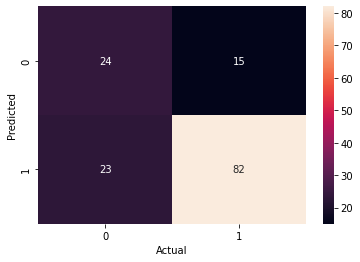

In [116]:
y_pred = dc.predict(X_test)
acc = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Accuracy:",acc)
print("F1-score:",f1)
cm  = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [117]:
y_test.value_counts()

1    97
0    47
Name: Loan_Status, dtype: int64

In [118]:
y_train.value_counts()

1    235
0    101
Name: Loan_Status, dtype: int64

There is a huge imbalance in the count of each class. Hence we perform oversampling

#### Oversampling using SMOTE

In [168]:
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

In [169]:
unique, counts = np.unique(y_resampled, return_counts=True)
print("Class Distribution After SMOTE:")
print(dict(zip(unique, counts)))

Class Distribution After SMOTE:
{0: 332, 1: 332}


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
dc.fit(X_train,y_train)

DecisionTreeClassifier()

Test Data
Accuracy: 0.745
F1-score: 0.7792207792207793


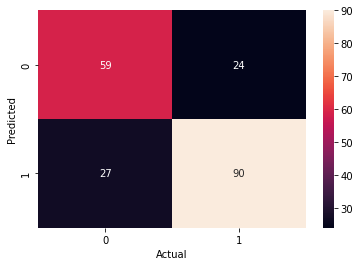

In [171]:
y_pred = dc.predict(X_test)
acc = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Test Data")
print("Accuracy:",acc)
print("F1-score:",f1)
cm  = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Train Data
Accuracy: 1.0
F1-score: 1.0


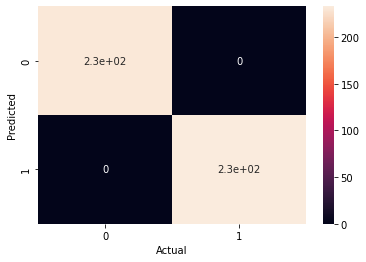

In [123]:
y_pred = dc.predict(X_train)
acc = accuracy_score(y_pred,y_train)
f1 = f1_score(y_pred,y_train)
print("Train Data")
print("Accuracy:",acc)
print("F1-score:",f1)
cm  = confusion_matrix(y_pred,y_train)
sns.heatmap(cm,annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

The model is able to produce 100% accuracy and f1 score in training data but lesser score in case of testing data. There are higher chances for overfitting

We are going to perform Cost complexity pruning to overcome overfitting

### Post Pruning

In [124]:
path = dc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [125]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=56, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [126]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


In [127]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

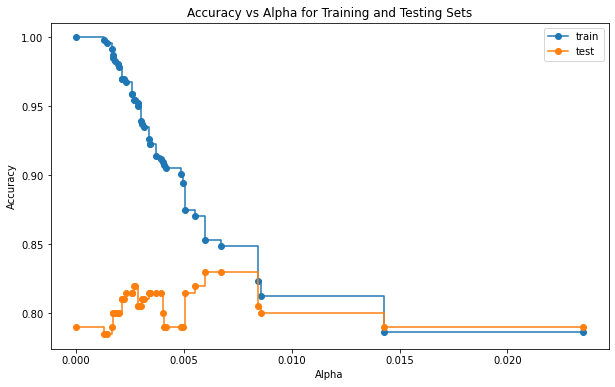

In [128]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Training and Testing Sets")
plt.legend()
plt.show()

Form the above visualization, we can see that with an ccp_alpha value closer to 0.01 will prevent the tree from overfitting and alo provides a higher test accuracy 

In [129]:
# dc_new = DecisionTreeClassifier(ccp_aplha = )
ccp_alphas[np.argmax(test_scores)]

0.0059597192256578765

In [130]:
alpha_df = pd.DataFrame(test_scores,columns = ['Test'])

In [131]:
alpha_df['Train'] = train_scores

In [132]:
alpha_df['Difference'] = alpha_df['Train'] - alpha_df['Test']

In [133]:
best = ccp_alphas[np.argmin(alpha_df['Difference'])]
print(best)

0.014259368223769553


In [173]:
dc_new = DecisionTreeClassifier(ccp_alpha = best)

In [174]:
dc_new.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.014259368223769553)

Train Data
Accuracy: 0.8232758620689655
F1-score: 0.8385826771653544


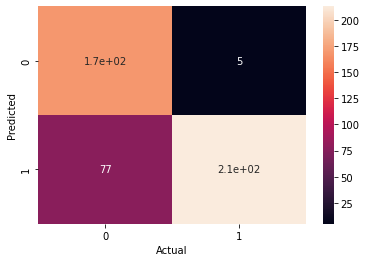

In [175]:
y_pred = dc_new.predict(X_train)
acc = accuracy_score(y_pred,y_train)
f1 = f1_score(y_pred,y_train)
print("Train Data")
print("Accuracy:",acc)
print("F1-score:",f1)
cm  = confusion_matrix(y_pred,y_train)
sns.heatmap(cm,annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Test Data
Accuracy: 0.815
F1-score: 0.8571428571428571


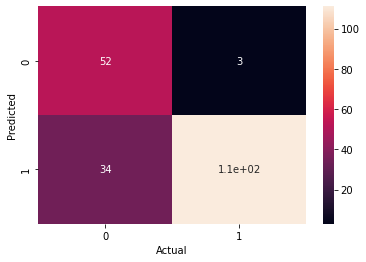

In [176]:
y_pred = dc_new.predict(X_test)
acc = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Test Data")
print("Accuracy:",acc)
print("F1-score:",f1)
cm  = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Now the model is capable of performing on unseen data as well. 

### Random Forest

Test Data
Accuracy: 0.855
F1-score: 0.859903381642512


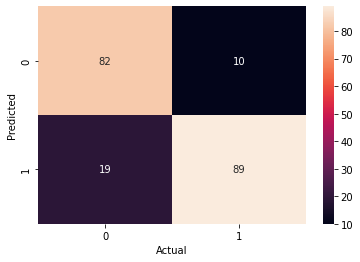

In [138]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Test Data")
print("Accuracy:",acc)
print("F1-score:",f1)
cm  = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

The Random forest is providing accuracy and f1 score almost closer to the Pruned Decision Tree model 

Train Data
Accuracy: 1.0
F1-score: 1.0


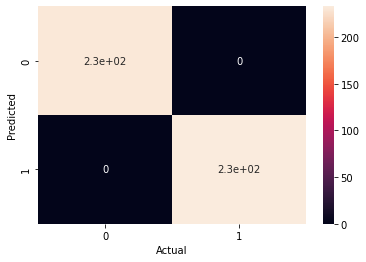

In [140]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_train)
acc = accuracy_score(y_pred,y_train)
f1 = f1_score(y_pred,y_train)
print("Train Data")
print("Accuracy:",acc)
print("F1-score:",f1)
cm  = confusion_matrix(y_pred,y_train)
sns.heatmap(cm,annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Again we encounter a case of overfitting in Random Forest

### Xtreme Gradient Boost

Test Data
Accuracy: 0.845
F1-score: 0.8487804878048781


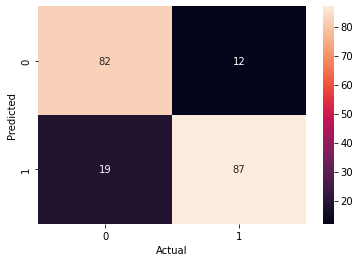

In [141]:
xg = xgb.XGBClassifier()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
acc = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Test Data")
print("Accuracy:",acc)
print("F1-score:",f1)
cm  = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Train Data
Accuracy: 1.0
F1-score: 1.0


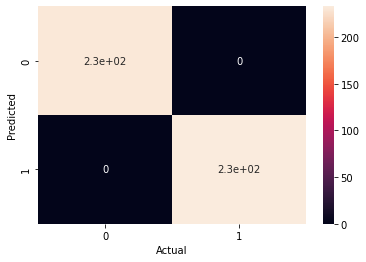

In [142]:
y_pred = xg.predict(X_train)
acc = accuracy_score(y_pred,y_train)
f1 = f1_score(y_pred,y_train)
print("Train Data")
print("Accuracy:",acc)
print("F1-score:",f1)
cm  = confusion_matrix(y_pred,y_train)
sns.heatmap(cm,annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

XGBoost also overfits the model.
Comparing all the models, the pruned decision provides the highest accuracy and f1 score.

### Saving the model

In [177]:
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dc_new, f)

In [153]:
test = pd.read_csv(r"D:\Projects\Loan Approval Prediction\test.csv")

In [ ]:
dict1 = {0:'No',1:'Yes'}
data_1['Credit_History'] = data_1['Credit_History'].map(dict1)

In [186]:
def cleansing(test):
    test = test.dropna()
    test = test.drop(['Loan_ID'],axis = 1)
    dict1 = {0:'No',1:'Yes'}
    test['Credit_History'] = test['Credit_History'].map(dict1)
    cat =  test.select_dtypes(include = ['object'])
    num = test.select_dtypes(include = ['int64','float64'])
    for i in cat.columns:
        a = pd.get_dummies(cat[i],prefix = i)
        cat = pd.concat([cat,a],axis = 1) 
    encoded = cat.drop(['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'],axis = 1)
    encoded = pd.concat([encoded,num],axis = 1)
    return encoded

def min_max_scaling(test):
    min_max = MinMaxScaler()
    scaled = min_max.fit_transform(test)
    return scaled

In [179]:
with open('decision_tree_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [188]:
pre1 = FunctionTransformer(func=cleansing)
pre2 = FunctionTransformer(func=min_max_scaling)
pipeline = Pipeline([
    ('custom_preprocessing1', pre1),  # Custom preprocessing function 1
    ('custom_preprocessing2', pre2),  # Custom preprocessing function 2
    ('model', model)])       

In [189]:
predictions = pipeline.predict(test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [190]:
print(predictions)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
